In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/khin/local/hse/1st_semester/python/hw_6/Electronic_sales_Sep2023-Sep2024.csv')

In [43]:
# Предпочитаемый метод оплаты

each_use = (
    df
    .groupby(['Customer ID', 'Payment Method'])
    .agg({'Payment Method':'count'})
    .rename(columns={'Payment Method':'favorite'})
    .reset_index()
    .sort_values(['Customer ID', 'Payment Method', 'favorite'], ascending=[True, True, False])    
)

preferred_methods = (
    each_use.loc[each_use.groupby("Customer ID")["favorite"].idxmax()]
    .reset_index(drop=True)
    .loc[:, ["Customer ID", "Payment Method"]]
)

# Общие траты
total_completed_payments = df[df['Order Status'] == 'Completed'].groupby('Customer ID').agg({'Total Price': 'sum'})
total_price = df[['Customer ID']].drop_duplicates().merge(total_completed_payments, how='left', on='Customer ID').fillna(0)

# Количество денег, потраченных на дополнительные услуги и аксессуары
add_on_completed = df[df['Order Status'] == 'Completed'].groupby('Customer ID').agg({'Add-on Total': 'sum'})
total_add_on = df[['Customer ID']].drop_duplicates().merge(add_on_completed, how='left', on='Customer ID').fillna(0)

# На основании датасета получите доход:
#  по каждому методу доставки,
#  по каждому типу продукта,
#  по дополнительным услугам за каждый месяц,
#  по дополнительным услугам за каждый квартал.


In [84]:
#df['shared_rev'] = df['Total Price'] + df['Add-on Total']
df['year'] = pd.to_datetime(df['Purchase Date']).dt.year
df['quarter'] = pd.to_datetime(df['Purchase Date']).dt.quarter
df['month'] = pd.to_datetime(df['Purchase Date']).dt.month

revenue_by_shipping = df[df['Order Status'] == 'Completed'].groupby(['Shipping Type']).agg({'Total Price': 'sum'}).reset_index()
revenue_by_prodtype = df[df['Order Status'] == 'Completed'].groupby(['Product Type']).agg({'Total Price': 'sum'}).reset_index()
revenue_by_add_on_m = df[df['Order Status'] == 'Completed'].groupby(['year', 'month']).agg({'Add-on Total': 'sum'}).reset_index()
revenue_by_add_on_q = df[df['Order Status'] == 'Completed'].groupby(['year', 'quarter']).agg({'Add-on Total': 'sum'}).reset_index()

In [96]:
revenue_by_add_on_q

,year,quarter,Add-on Total
0,2023,3,5337.61
1,2023,4,73356.77
2,2024,1,258222.60
3,2024,2,256316.84
4,2024,3,242361.42


/var/folders/8x/py78bv316g35sfyx4zxjd9vm0000gn/T/ipykernel_17797/3989343718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Shipping Type", y="Total Price", data=revenue_by_shipping, palette="Blues")
/var/folders/8x/py78bv316g35sfyx4zxjd9vm0000gn/T/ipykernel_17797/3989343718.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Type", y="Total Price", data=revenue_by_prodtype, palette="Greens")


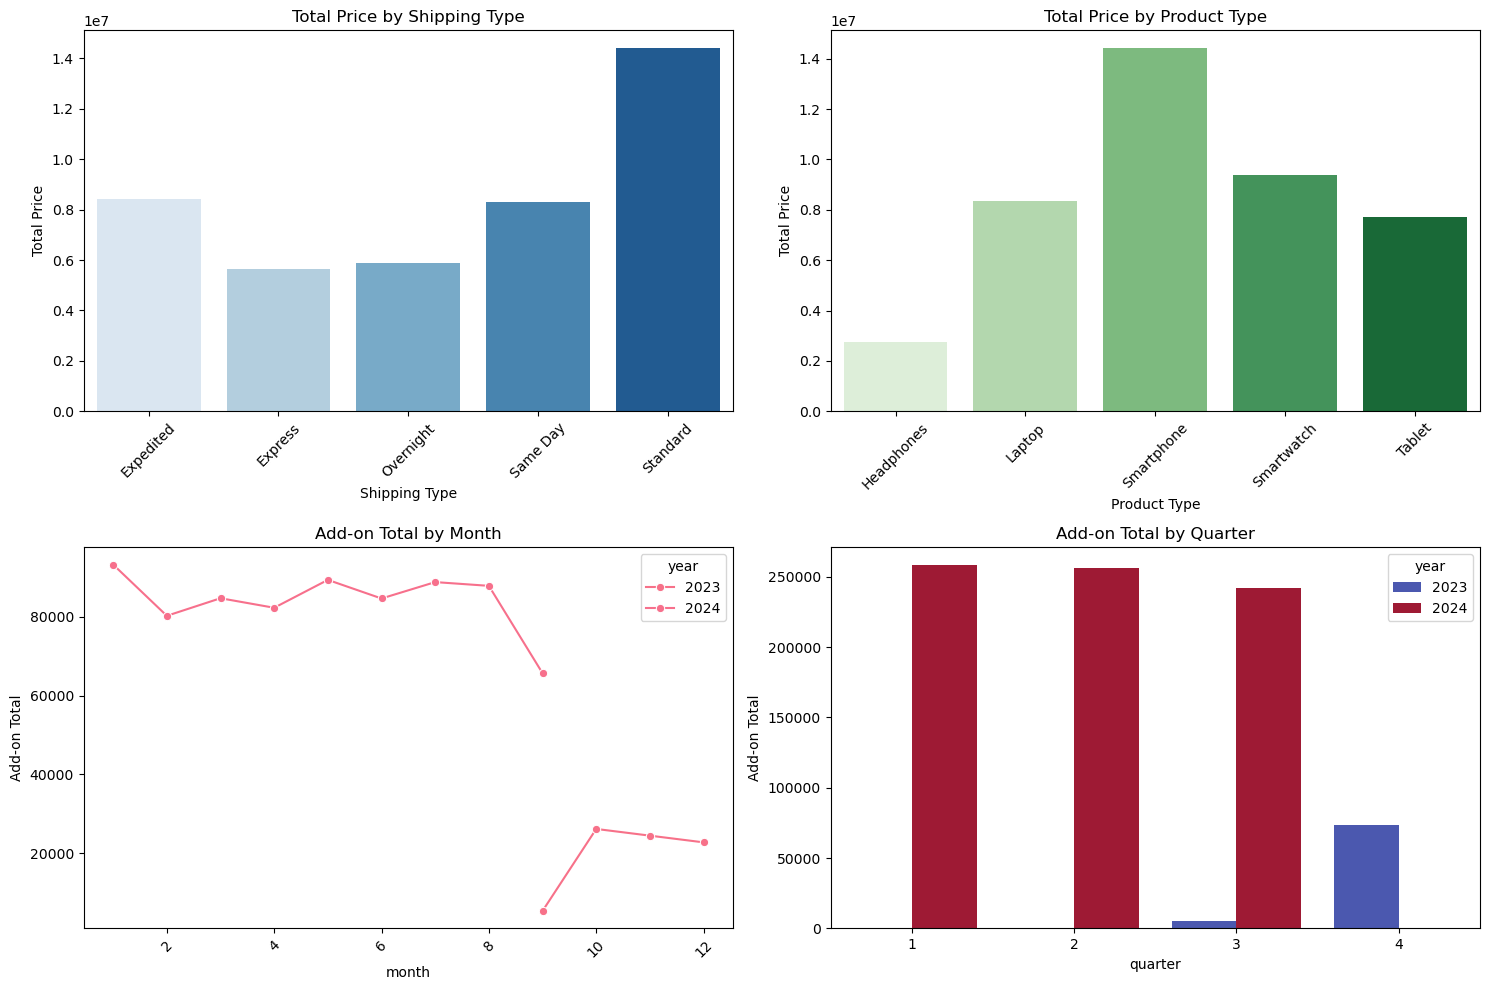

In [98]:
# Визуализация
plt.figure(figsize=(15, 10))

# График 1: Shipping Type
plt.subplot(2, 2, 1)
sns.barplot(x="Shipping Type", y="Total Price", data=revenue_by_shipping, palette="Blues")
plt.title("Total Price by Shipping Type")
plt.ylabel("Total Price")
plt.xlabel("Shipping Type")
plt.xticks(rotation=45)

# График 2: Product Type
plt.subplot(2, 2, 2)
sns.barplot(x="Product Type", y="Total Price", data=revenue_by_prodtype, palette="Greens")
plt.title("Total Price by Product Type")
plt.ylabel("Total Price")
plt.xlabel("Product Type")
plt.xticks(rotation=45)

# График 3: Add-on Total by Month
plt.subplot(2, 2, 3)
sns.lineplot(x="month", y="Add-on Total", hue="year", data=revenue_by_add_on_m, palette="husl", marker="o")
plt.title("Add-on Total by Month")
plt.ylabel("Add-on Total")
plt.xlabel("month")
plt.xticks(rotation=45)

# График 4: Add-on Total by Quarter
plt.subplot(2, 2, 4)
sns.barplot(x="quarter", y="Add-on Total", hue="year", data=revenue_by_add_on_q, palette="coolwarm")
plt.title("Add-on Total by Quarter")
plt.ylabel("Add-on Total")
plt.xlabel("quarter")

plt.tight_layout()
plt.show()


,Customer ID,Total Price
0,1000,741.09
1,1002,5020.60
2,1003,41.50
3,1004,83.00
4,1005,11779.11
...,...,...
12131,19994,0.00
12132,19995,5394.56
12133,19996,12063.02
12134,19997,0.00
